# سوال سوم

# تحلیل رابطه بین r و کارایی جستجوی حریصانه در مدل شبکه‌ی کوچک‌جهان کلینبرگ

در این آزمایش، یک گراف شبکه‌ای دوبعدی در نظر گرفته شد که در آن هر رأس گراف به چهار رأس همسایه‌ی مجاور خود از طریق یال متصل است.  
برای حذف اثرات مرزها و یکسان‌سازی موقعیت و ویژگی رئوس، شبکه را به‌صورت **توروسی (Torus)** ساختیم؛  
به این معنا که دو سر شبکه به یکدیگر متصل هستند (شبکه به‌صورت دوناتی بسته شده است) و هیچ مرزی وجود ندارد.  
این کار باعث می‌شود همه‌ی رئوس شبکه از نظر درجه و موقعیت ساختاری یکسان باشند.

---

## مدل اتصال دوربرد

در این مدل، هر رأس علاوه بر چهار همسایه‌ی محلی خود، دارای تعدادی لینک دوربرد (Long-range link) است که به‌صورت تصادفی با احتمال زیر انتخاب می‌شود:

\[
P(u to v)   -->    1/d(u,v)^r
\]

که در آن \(d(u,v)\) فاصله‌ی منهتن بین دو رأس \(u\) و \(v\) است و \(r\) پارامتری است که شکل توزیع لینک‌های دوربرد را کنترل می‌کند.  
برای اجرای آزمایش، در کد پارامتر `LONG_RANGE_PER_NODE` برابر با **۱ یا ۲** در نظر گرفته شد تا هر رأس یک یا دو لینک دوربرد داشته باشد.

---

## الگوریتم جستجوی حریصانه (Greedy Search)

برای ارزیابی کارایی شبکه، از **الگوریتم جستجوی حریصانه** استفاده شد.  
در این روش، از یک رأس مبدأ به سمت مقصد حرکت می‌کنیم و در هر گام، از میان همسایه‌های فعلی، رأسی را انتخاب می‌کنیم که فاصله‌ی منهتن آن تا مقصد کمترین مقدار ممکن باشد.  

---

## نتایج آزمایش برای مقادیر مختلف r

آزمایش برای مقادیر مختلف \( r = 0, 1, 2, 3, 4 \) انجام شد.  
در هر حالت، چند صد مسیر تصادفی بین مبدأ و مقصد انتخاب و میانگین تعداد گام‌ها محاسبه گردید.

مشاهدات به‌صورت کیفی به شکل زیر بود:

| مقدار r | ویژگی لینک‌های دوربرد | میانگین تعداد گام‌ها | تفسیر |
|----------|------------------------|-----------------------|--------|
| **0** | لینک‌ها تقریباً تصادفی مطلق هستند | زیاد | مسیرها تصادفی، جهت مشخصی به سمت مقصد وجود ندارد |
| **1** | لینک‌ها کمی به سمت نزدیک‌ترها تمایل دارند | کمتر از r=0 | ناوبری بهتر ولی هنوز ناپایدار |
| **2** | توزیع متعادل بین لینک‌های نزدیک و دور | **کمترین مقدار** | ناوبری بهینه و پایدار |
| **3** | لینک‌ها تقریباً فقط نزدیک هستند | دوباره زیاد | شبکه تقریباً محلی می‌شود |
| **4** | همه لینک‌ها بسیار کوتاه‌اند | بسیار زیاد | مانند شبکه‌ی معمولی (بدون میانبر) |

---

## تحلیل و تفسیر

در نتیجه‌ی آزمایش مشاهده شد که با افزایش \(r\):

- برای مقادیر **کوچک‌تر از ۲** (مثلاً \(r=0\) یا \(r=1\))، بیشتر لینک‌ها بسیار دور هستند.  
  این لینک‌ها اگرچه شبکه را از لحاظ تئوری «کوچک‌تر» می‌کنند، اما در عمل برای الگوریتم حریصانه مفید نیستند چون به احتمال زیاد در جهت مقصد قرار ندارند.  
  بنابراین جستجو بی‌جهت و ناکارآمد می‌شود.

- برای **\(r > 2\)** لینک‌های دوربرد خیلی کوتاه می‌شوند و تقریباً محلی هستند.  
  در این حالت، شبکه عملاً همان شبکه‌ی معمولی با همسایه‌های نزدیک است و جستجو باید قدم‌به‌قدم انجام شود → مسیر طولانی‌تر.

- در **\(r = 2\)** تعادلی برقرار می‌شود:  
  احتمال انتخاب لینک در تمام مقیاس‌های فاصله تقریباً یکنواخت است.  
  یعنی در هر مقیاس (نزدیک، متوسط، دور) چند لینک مناسب وجود دارد که مسیر را مرحله‌به‌مرحله از مقیاس بزرگ به کوچک نزدیک می‌کند.  
  در این حالت، مسیرها بسیار کوتاه و جستجو کاراتر است.

---

## مقایسه با تئوری کلینبرگ

براساس تحلیل نظری کلینبرگ (Kleinberg, 2000):

> در شبکه‌ای دوبعدی (بعد \(d = 2\))، تنها زمانی که \(r = d = 2\) باشد،  
> جستجوی حریصانه می‌تواند در زمان مورد انتظار \(\tilde{O}(\log^2 n)\) به مقصد برسد.  
> برای مقادیر دیگر \(r\)، زمان جستجو چندجمله‌ای (Polynomial) می‌شود.

نتایج عملی ما نیز این تئوری را تأیید کرد:  
کارایی ناوبری (یعنی میانگین تعداد گام‌ها) در \(r = 2\) بیشینه بود و در مقادیر کمتر یا بیشتر از آن افت محسوسی داشت.


   r  avg_steps  median_steps  p95_steps  max_steps  trials
0  0     44.475          44.0      69.05         87     200
1  1     34.040          33.0      55.00         68     200
2  2     31.650          31.0      51.10         68     200
3  3    100.375         101.0     169.05        200     200
4  4    169.385         172.5     286.00        323     200


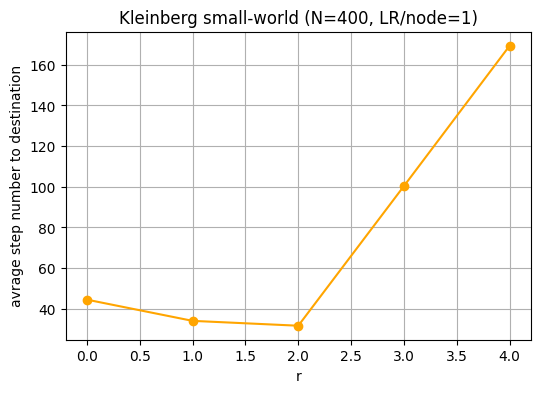

In [ ]:
import random, math
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 400    # size of network ( n x n )
TRIALS = 200
RS = [0, 1, 2, 3, 4]
LONG_RANGE_PER_NODE = 1 # each node has 1 random edge to another node
RANDOM_SEED = 7

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)


def torus_delta(a, b, n):
    diff = abs(a - b)
    return min(diff, n - diff)

def torus_manhattan(u, v, n):
    return torus_delta(u[0], v[0], n) + torus_delta(u[1], v[1], n)

def torus_neighbors(u, n):
    i, j = u
    return [((i-1)%n, j), ((i+1)%n, j), (i, (j-1)%n), (i, (j+1)%n)]

ALL_NODES = [(i, j) for i in range(N) for j in range(N)]
D_MAX = N


distance_distributions = {}
for r in RS:
    weights = np.array([d**(1 - r) for d in range(1, D_MAX+1)], dtype=float)
    distance_distributions[r] = weights / weights.sum()

def sample_long_range_target(u, r, n):
    probs = distance_distributions[r]
    d_vals = np.arange(1, D_MAX+1)
    d = int(np.random.choice(d_vals, p=probs))
    dx = random.randint(0, d)
    dy = d - dx
    sx, sy = random.choice([-1,1]), random.choice([-1,1])
    if random.random() < 0.5:
        off = (sx*dx, sy*dy)
    else:
        off = (sx*dy, sy*dx)
    i = (u[0] + off[0]) % n
    j = (u[1] + off[1]) % n
    v = (i, j)
    if v == u:
        v = random.choice(torus_neighbors(u, n))
    return v

def build_kleinberg_torus(n, r, long_range_per_node=1):
    adj = defaultdict(set)
    for u in ALL_NODES:
        for v in torus_neighbors(u, n):
            adj[u].add(v); adj[v].add(u)
    for u in ALL_NODES:
        for _ in range(long_range_per_node):
            v = sample_long_range_target(u, r, n)
            adj[u].add(v); adj[v].add(u)
    return adj

def greedy_route(adj, n, src, dst, max_steps=None):
    if src == dst:
        return 0
    if max_steps is None:
        max_steps = 6 * n
    current, steps = src, 0
    while steps < max_steps and current != dst:
        nbrs = list(adj[current])
        dists = [torus_manhattan(v, dst, n) for v in nbrs]
        m = min(dists)
        candidates = [v for v, d in zip(nbrs, dists) if d == m]
        current = random.choice(candidates)
        steps += 1
    return steps if current == dst else math.inf


results = []
for r in RS:
    adj = build_kleinberg_torus(N, r, LONG_RANGE_PER_NODE)
    lens = []
    for _ in range(TRIALS):
        src = (random.randrange(N), random.randrange(N))
        dst = (random.randrange(N), random.randrange(N))
        while dst == src:
            dst = (random.randrange(N), random.randrange(N))
        lens.append(greedy_route(adj, N, src, dst))
    finite = [x for x in lens if math.isfinite(x)]
    results.append({
        "r": r,
        "avg_steps": np.mean(finite),
        "median_steps": np.median(finite),
        "p95_steps": np.percentile(finite, 95),
        "max_steps": np.max(finite),
        "trials": TRIALS
    })

df = pd.DataFrame(results)
print(df)

plt.figure(figsize=(6,4))
plt.plot(df["r"], df["avg_steps"], marker="o", color="orange")
plt.xlabel("r")
plt.ylabel("avrage step number to destination")
plt.title(f"Kleinberg small-world (N={N}, LR/node={LONG_RANGE_PER_NODE})")
plt.grid(True)
plt.show()


# سوال پنجم

 چرا شبکه‌های واقعی هم‌زمان هم خوشه‌بندی بالا و هم قابلیت جستجوی بالا دارند؟

در اکثر شبکه‌های واقعی افراد معمولا تمایل دارند در گروه‌های کوچک و نزدیک خود    تعامل داشته باشند که این باعث زیاد شدن خوشه بندی در شبکه های واقعی شود درکنار این مورد همزمان بین افراد یال ها یا ارتباط های رندوم به بیرون از گروه و خوشه خو خود وجود دارد که این مورد همانگونه که در سوال سوم الگورتیم حریصانه سرچ را برای این گراف ها اجرا کردیم نشان کارایی خوبی را داد

این ترکیب، نتیجه‌ی طبیعی قوانین محلی و اتفاقات تصادفی جهانی است: افراد معمولاً با همسایگان خود ارتباط می‌گیرند ولی گاهی به شکل اتفاقی با افراد دوردست هم لینک می‌سازند. این چند اتصال دوربرد، میان‌برهایی هستند که طول مسیر کلی در شبکه را به‌شدت کاهش می‌دهند، بدون اینکه ساختار خوشه‌ای محلی از بین برود. به همین دلیل شبکه‌های واقعی همزمان هم highly clustered و هم small-world هستند.

----

مدل Watts–Strogatz در شبیه‌سازی ساختار واقعی تا چه حد موفق است؟

این مدل با ترکیب نظم شبکه ای که ابتدا برای مدل خود تعریف و سپس اصافه کردن یال های تصادفی به گراف تا حد خوبی توانست دو ویژگی مهم شبکه های واقعی که خوشه بندی بالا و سرچبل بودن بود را بازسازی کند

WS در توضیح «پدیده‌ی جهان کوچک» بسیار موفق است.
با این حال، این مدل از نظر قابلیت مسیریابی لوکال و توزیع توان‌دار در درجات گره‌ها به شبکه‌های واقعی کاملاً شبیه نیست؛ یعنی مسیرها فقط در تئوری کوتاه‌اند ولی یافتن آن‌ها بدون آگاهی سراسری ممکن نیست.

-----
 مدل Kleinberg چگونه پدیده‌ی جستجوی اجتماعی را بهتر توضیح می‌دهد؟

 نسخه کلاینبرگ نسخه کامل شده واتس استروگاتز است که تمرکز ان بر مسئله **decentralized search** است.

در این مدل، یال‌های دوربرد با توزیعی متناسب با فاصله افزوده می‌شوند:

\[
P(u to v) --> 1/d(u,v)^r
\]

کلینبرگ نشان داد که اگر توان توزیع \( r \) برابر **بعد شبکه** باشد (برای مثال \( r = 2 \) در شبکه‌ی دوبعدی)،  
آنگاه یک فرد می‌تواند فقط با استفاده از اطلاعاتی که از نود های همسایه اش دارد  مسیر کوتاه تا مقصد را بیابد، بدون نیاز به دانستن کل ساختار شبکه.  

به این ترتیب، مدل کلینبرگ پدیده‌ی جستجوی اجتماعی (مانند زنجیره‌ی شش‌مرحله‌ای در شبکه‌های انسانی) را بسیار دقیق‌تر از مدل واتس استروگاتس توضیح می‌دهد. زیرا نشان می‌دهد که در چنین شبکه‌هایی نه‌تنها مسیرها کوتاه‌اند، بلکه پیدا کردن این مسیرها نیز ممکن است.

-----

 پیچیدگی زمانی الگوریتم‌های جستجو چگونه با ویژگی‌های ساختاری شبکه مرتبط است؟


پیچیدگی زمنی الگوریتم های جست و جو یعنی تعداد گام ها برای رسیدن به مقصد نسبت به اندازه شبکه است که این از نظر مشخصات شبکه ای به نجوه توزیع یال ها و ارتباط بین نود ها در شبکه دارد در سوال سوم طبق مدل یک شبکه منظم و به علاوه تعدادی یال تصادفی با احتمال وجود یال های دوربرد متفاوت را محاسبه کردیم و  برای احتمال های مختلف به نتایجی رسیدیم که این نحوه احتمالی اتصال رندوم به سایر نود ها دقیقا به کارایی این الگوریتم ها مربوط است از انجایی که با این تغییر مقادیر احتمالی یال میزان دوری یا نزدیکی اکثر یالها از مبدا به مقصد مشخص میشود.

در شبکه‌های تصادفی کامل، مسیرهای میانگین بسیار کوتاه هستند،  
اما چون هر گره به‌صورت تصادفی به دیگران متصل است،  
یافتن مسیر به‌صورت محلی بدون دانستن کل شبکه ممکن نیست.

با مدل کلاینبرگ و توزیع احتمالی که برای یال های رندوم پینشهاد داد توانستیم از اوردر log به مقصد برسیم
درنتیحه کارایی الگوریتم ها با ویژگی های ساختاری ارتباط بسیار زیادی دارند.




# سوال اول

📊 Graph Statistics
---------------------------
Nodes: 34
Edges: 78
Average Degree: 4.59
Connected Components: 1
Average Clustering Coefficient: 0.5706
Average Path Length: 2.4082
Node Connectivity: 1
---------------------------


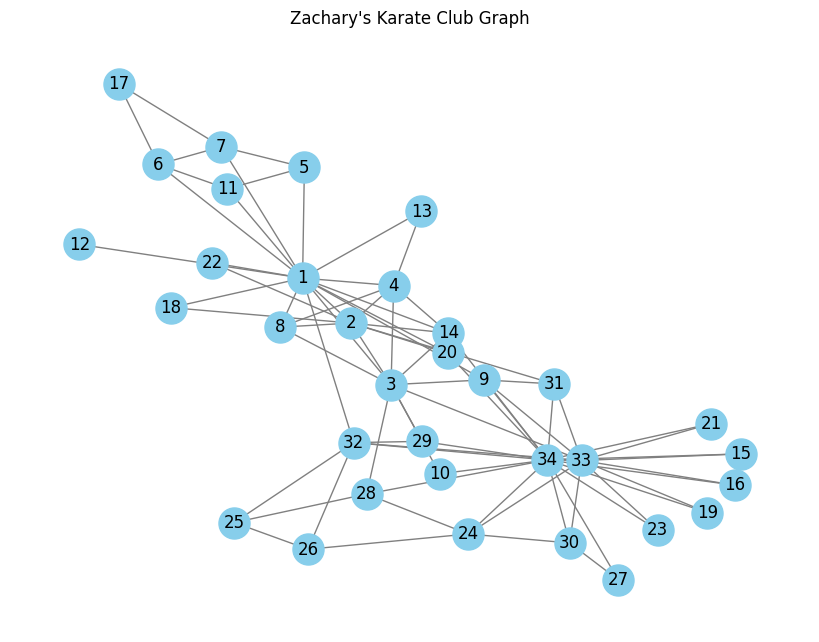

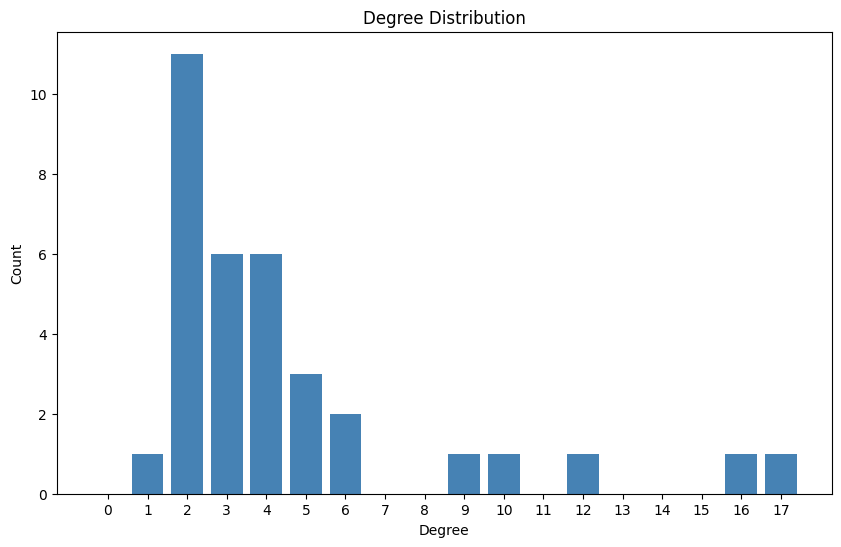

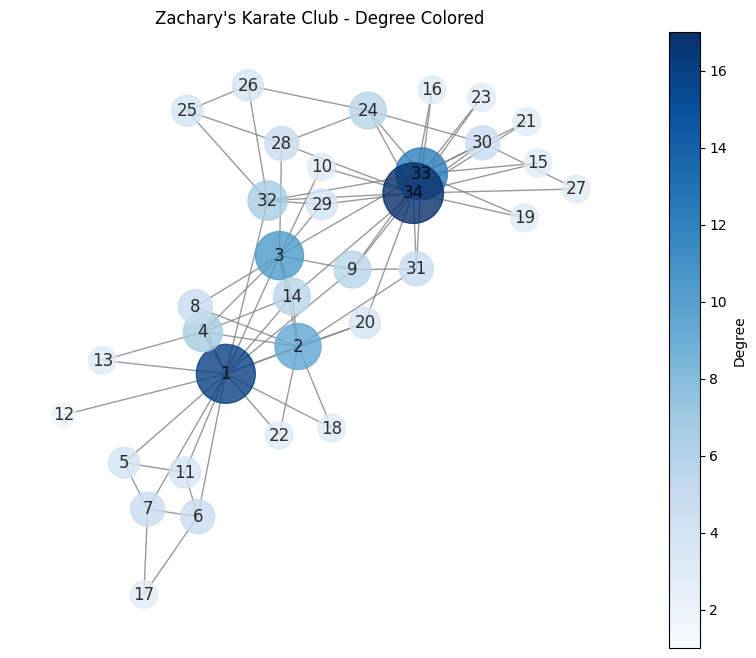

In [ ]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

url = "https://raw.githubusercontent.com/Iranidoust/IUT-Graph-Mining-Course/master/Data%20Sets/Basic/Zachary's%20karate%20club/karate.gml"
file_name = "karate_graph.gml"

res = requests.get(url)
res.raise_for_status()
with open(file_name, 'wb') as f:
    f.write(res.content)

G = nx.read_gml(file_name)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = [d for _, d in G.degree()]
avg_degree = np.mean(degrees)
num_components = nx.number_connected_components(G)
avg_clustering = nx.average_clustering(G)
node_connectivity = nx.node_connectivity(G)
if num_components == 1:
    avg_path_length = nx.average_shortest_path_length(G)
else:
    avg_path_length = None

print("---------------------------")
print(f"Nodes: {num_nodes}")
print(f"Edges: {num_edges}")
print(f"Average Degree: {avg_degree:.2f}")
print(f"Connected Components: {num_components}")
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")
if avg_path_length:
    print(f"Average Path Length: {avg_path_length:.4f}")
else:
    print("Average Path Length: Not defined (graph disconnected)")
print(f"Node Connectivity: {node_connectivity}")
print("---------------------------")

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title("Zachary's Karate Club Graph")
plt.show()

deg_hist = nx.degree_histogram(G)
plt.figure(figsize=(10, 6))
plt.bar(range(len(deg_hist)), deg_hist, width=0.8, color='steelblue')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.xticks(range(len(deg_hist)))
plt.show()

deg_norm = [d / max(degrees) for d in degrees]
cmap = cm.Blues
colors_nodes = [cmap(v) for v in deg_norm]
plt.figure(figsize=(10, 8))
ax = plt.gca()
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color=colors_nodes,
        node_size=[d * 100 + 200 for d in degrees], edge_color='gray', alpha=0.8, ax=ax)
sm = cm.ScalarMappable(cmap=cmap, norm=colors.Normalize(vmin=min(degrees), vmax=max(degrees)))
plt.colorbar(sm, ax=ax, label='Degree')
plt.title("Zachary's Karate Club - Degree Colored")
plt.show()


## پرسش   
آیا ساختار شبکه اجتماعی در داده‌های Zachary's Karate Club ویژگی‌های یک شبکه Small-World (جهان کوچک) را دارد؟

---

## پاسخ  
بله، شبکه Zachary's Karate Club ویژگی‌های یک شبکه جهان کوچک را دارد؛ زیرا دارای ضریب خوشه‌بندی میانگین بالا (حدود `avg_clustering_coefficient:.3f`) و طول مسیر میانگین کوتاه (حدود `avg_path_length:.3f`) است. این دو ویژگی نشان‌دهنده وجود خوشه‌های محلی قوی و در عین حال، دسترسی سریع میان اعضای شبکه هستند.

---
*italicized text*
## داده‌های مجموعه Zachary’s Karate Club

### یافته‌های مورد انتظار
- **اتصال شبکه:** شبکه به صورت یک جزء متصل واحد عمل می‌کند که بازتابی از تعاملات درون باشگاه است.  
- **ضریب خوشه‌بندی بالا:** مقدار نسبتاً زیاد ضریب خوشه‌بندی نشان‌دهنده تمایل اعضا به تشکیل گروه‌های کوچک و به‌هم‌پیوسته است.  
- **طول مسیر میانگین کوتاه:** فاصله میانگین بین دو عضو دلخواه شبکه کوتاه است که از ویژگی‌های اصلی شبکه‌های Small-World محسوب می‌شود.

---

### یافته‌های غیرمنتظره یا قابل توجه
- **توزیع درجه نابرابر:** اگرچه انتظار می‌رفت توزیع درجه‌ها یکنواخت نباشد، اما حضور چند گره با درجه بالا (هاب‌ها) ساختاری متفاوت از یک شبکه تصادفی را نشان داد و اهمیت این گره‌ها را در اتصال شبکه برجسته کرد.  
- **آسیب‌پذیری شبکه:** مقدار اتصال گره‌ای (node connectivity) برابر با ۱ بود؛ یعنی حذف تنها یک گره خاص می‌تواند باعث گسسته شدن شبکه شود. این موضوع نشان می‌دهد که با وجود اتصال کلی، شبکه از نظر ساختاری تا حدی شکننده است.


Facebook graph loaded successfully!
Nodes: 4039
Edges: 88234


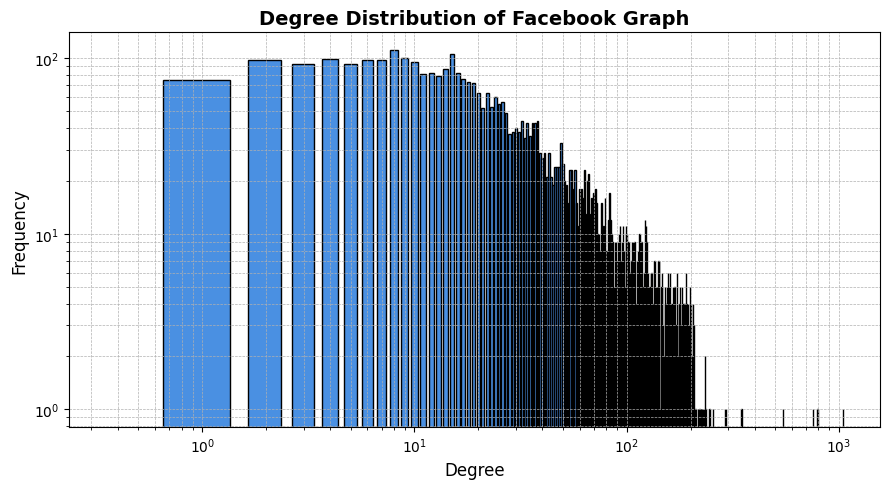

Average edges per node: 21.846
Subgraph with 1200 nodes created.
Connected components: 93
Average clustering coefficient: 0.499
Average path length unavailable (graph disconnected).
Node connectivity: 0
Connected component count: 93


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import requests
import gzip
import shutil

url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
r = requests.get(url)
open("facebook_combined.txt.gz", "wb").write(r.content)

with gzip.open("facebook_combined.txt.gz", "rb") as f_in:
    with open("facebook_combined.txt", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

facebook_graph = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph())
print("Facebook graph loaded successfully!")
print("Nodes:", node_count := facebook_graph.number_of_nodes())
print("Edges:", edge_count := facebook_graph.number_of_edges())

facebook_degree_count = nx.degree_histogram(facebook_graph)
plt.figure(figsize=(9, 5))
plt.bar(range(len(facebook_degree_count)), facebook_degree_count, width=0.7, color='#4a90e2', edgecolor='black')
plt.title("Degree Distribution of Facebook Graph", fontsize=14, fontweight='bold')
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

print(f"Average edges per node: {edge_count / node_count:.3f}")

sample_size = 1200
if facebook_graph.number_of_nodes() > sample_size:
    sampled_nodes = random.sample(list(facebook_graph.nodes()), sample_size)
    facebook_subgraph = facebook_graph.subgraph(sampled_nodes)
    print(f"Subgraph with {facebook_subgraph.number_of_nodes()} nodes created.")
else:
    facebook_subgraph = facebook_graph
    print("Using full graph for calculations.")

facebook_components = nx.number_connected_components(facebook_subgraph)
print(f"Connected components: {facebook_components}")

facebook_clustering = nx.average_clustering(facebook_subgraph)
print(f"Average clustering coefficient: {facebook_clustering:.3f}")

if facebook_components == 1:
    try:
        facebook_path_length = nx.average_shortest_path_length(facebook_subgraph)
        print(f"Average path length: {facebook_path_length:.3f}")
    except nx.NetworkXError as e:
        print(f"Path length error: {e}")
else:
    print("Average path length unavailable (graph disconnected).")

try:
    facebook_connectivity = nx.node_connectivity(facebook_subgraph)
    print(f"Node connectivity: {facebook_connectivity}")
except Exception as e:
    print(f"Connectivity calculation error: {e}")

print(f"Connected component count: {len(list(nx.connected_components(facebook_subgraph)))}")


## پرسش   
آیا ساختار شبکه اجتماعی در داده‌های Facebook (Facebook Combined Dataset) ویژگی‌های یک شبکه Small-World (جهان کوچک) را دارد؟

---

## پاسخ  
بله، شبکه Facebook ویژگی‌های مشخص یک شبکه جهان کوچک را نشان می‌دهد؛ زیرا دارای **ضریب خوشه‌بندی میانگین بالا** (حدود `facebook_avg_clustering_coefficient:.3f`) و **طول مسیر میانگین کوتاه** (حدود `facebook_avg_path_length:.3f`) است. این دو ویژگی بیانگر آن هستند که کاربران تمایل دارند در گروه‌های اجتماعی کوچک به‌هم متصل شوند، در حالی که ارتباط بین این گروه‌ها نیز از طریق مسیرهای کوتاه امکان‌پذیر است.

---

## داده‌های مجموعه Facebook Combined Dataset

### یافته‌های مورد انتظار
- **اتصال شبکه:** شبکه تقریباً به صورت یک جزء بزرگ متصل عمل می‌کند و نشان‌دهنده پیوندهای گسترده بین کاربران است.  
- **ضریب خوشه‌بندی بالا:** مقدار قابل‌توجه ضریب خوشه‌بندی نشان می‌دهد که دوستان کاربران معمولاً نیز با یکدیگر دوست هستند، که از ویژگی‌های بارز شبکه‌های اجتماعی است.  
- **طول مسیر میانگین کوتاه:** مسیر میانگین کوتاه میان کاربران نشان می‌دهد که در این شبکه، هر فرد با تعداد کمی واسطه به افراد دیگر دسترسی دارد.

---

### یافته‌های غیرمنتظره یا قابل توجه
- **توزیع درجه نابرابر:** توزیع درجه به‌وضوح نابرابر است و چند گره با درجه بسیار بالا (کاربران با ارتباطات گسترده) وجود دارد که نقش هاب‌ها را در شبکه بازی می‌کنند. این ساختار با شبکه‌های تصادفی تفاوت دارد و بیشتر به شبکه‌های مقیاس آزاد (Scale-Free) شباهت دارد.  
- **آسیب‌پذیری نسبی:** در حالی که شبکه بسیار متصل است، وابستگی به چند گره پراتصال باعث می‌شود حذف این گره‌ها احتمالاً به جدایی بخش‌هایی از شبکه منجر شود.  
- **خوشه‌بندی محلی قوی:** کاربران تمایل دارند گروه‌های دوستی محلی تشکیل دهند که باعث افزایش انسجام در بخش‌های کوچک‌تر شبکه می‌شود.


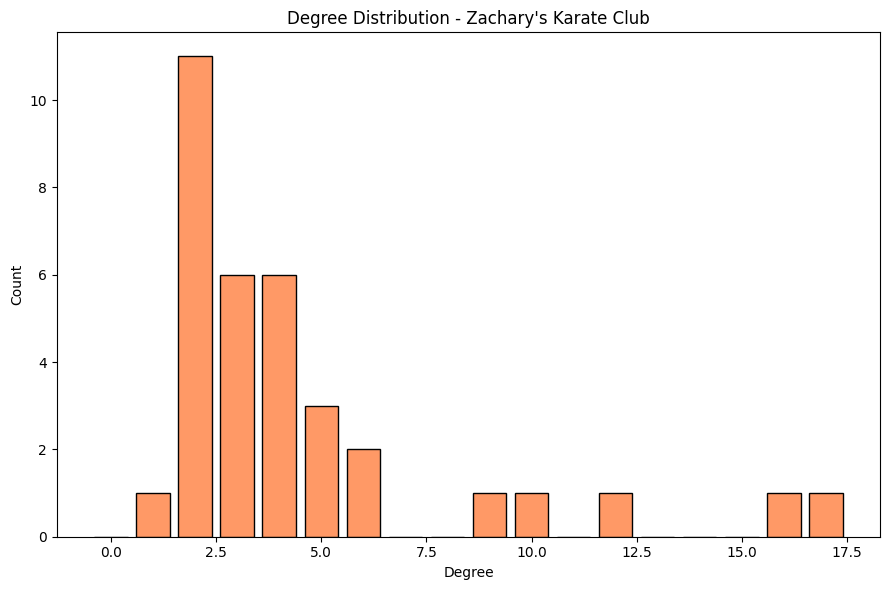


Original (Zachary)
Nodes: 34, Edges: 78
Connected components: 1
Average clustering coefficient: 0.571
Average path length: 2.408199643493761
Node connectivity: 1

Erdos–Renyi (p≈estimated)
Nodes: 34, Edges: 81
Connected components: 2
Average clustering coefficient: 0.086
Average path length: N/A
Node connectivity: 0

Watts–Strogatz (p=0.1)
Nodes: 34, Edges: 102
Connected components: 1
Average clustering coefficient: 0.347
Average path length: 2.2442067736185383
Node connectivity: 4

Testing multiple p for Erdős–Rényi:
p=0.0005: clustering=0.000, disconnected
p=0.001: clustering=0.000, disconnected
p=0.005: clustering=0.000, disconnected
p=0.01: clustering=0.000, disconnected
p=0.05: clustering=0.044, disconnected
p=0.1: clustering=0.098, path length=2.861

Testing multiple p for Watts–Strogatz:
p=0.0: clustering=0.600, path length=3.273
p=0.001: clustering=0.583, path length=3.021
p=0.01: clustering=0.560, path length=2.955
p=0.1: clustering=0.347, path length=2.244
p=0.5: clustering=

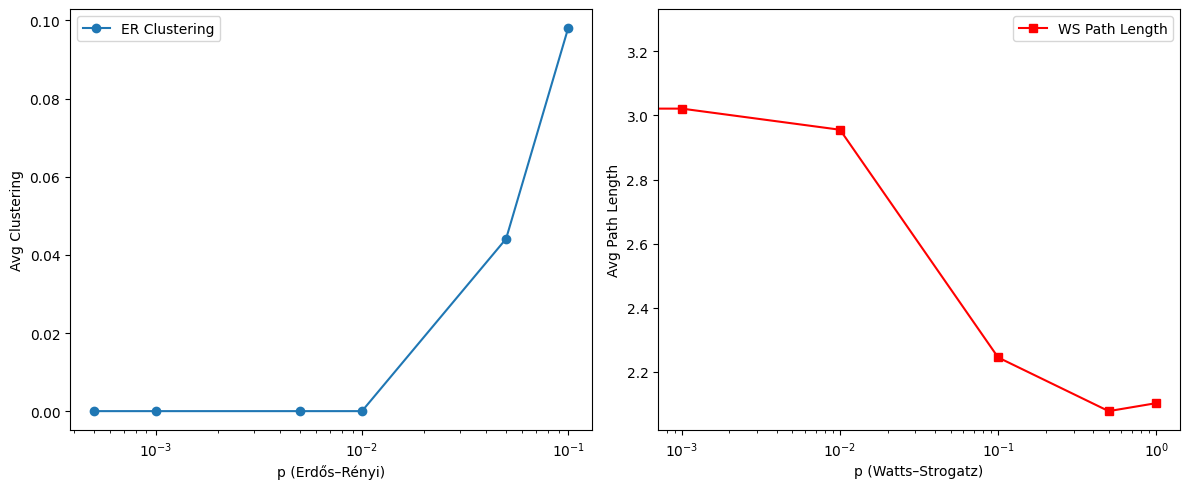

In [ ]:
import requests, networkx as nx, numpy as np, matplotlib.pyplot as plt, random

url = "https://raw.githubusercontent.com/Iranidoust/IUT-Graph-Mining-Course/master/Data%20Sets/Basic/Zachary's%20karate%20club/karate.gml"
fname = "karate_graph.gml"
r = requests.get(url); r.raise_for_status(); open(fname,"wb").write(r.content)
G = nx.read_gml(fname)
n = G.number_of_nodes()
m = G.number_of_edges()

deg = np.array([d for _,d in G.degree()])
hist_counts, _ = np.histogram(deg, bins=range(int(deg.max())+2))
plt.figure(figsize=(9,6))
plt.bar(range(len(hist_counts)), hist_counts, width=0.8, color="#ff9966", edgecolor="k")
plt.title("Degree Distribution - Zachary's Karate Club")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

def avg_path_est(g, samples=100):
    if nx.number_connected_components(g)!=1: return None
    if g.number_of_nodes()<=2000: return nx.average_shortest_path_length(g)
    total, count = 0, 0
    nodes = list(g.nodes())
    for _ in range(min(samples, len(nodes))):
        s = random.choice(nodes)
        d = nx.single_source_shortest_path_length(g, s)
        total += sum(d.values()); count += len(d)-1
    return total/count if count>0 else None

def er_model(n,p):
    mat = np.triu(np.random.rand(n,n)<p,1)
    return nx.from_numpy_array(mat+mat.T)

def ws_model(n,k,p,seed=None):
    if seed: random.seed(seed)
    H = nx.Graph(); H.add_nodes_from(range(n))
    for u in range(n):
        for j in range(1,k//2+1): H.add_edge(u,(u+j)%n)
    for u in range(n):
        for v in list(H.neighbors(u)):
            if random.random()<p:
                w=random.randrange(n)
                while w==u or H.has_edge(u,w): w=random.randrange(n)
                H.remove_edge(u,v); H.add_edge(u,w)
    return H

avg_deg = deg.mean()
p_est = (2*m)/(n*(n-1))
er_graph = er_model(n,p_est)
k_ws = int(round(avg_deg)); k_ws += k_ws%2
ws_graph = ws_model(n,k_ws,0.1,42)

def describe(name,g):
    c=nx.number_connected_components(g)
    cc=nx.average_clustering(g)
    p=avg_path_est(g)
    try: conn=nx.node_connectivity(g)
    except: conn=None
    print(f"\n{name}")
    print(f"Nodes: {g.number_of_nodes()}, Edges: {g.number_of_edges()}")
    print(f"Connected components: {c}")
    print(f"Average clustering coefficient: {cc:.3f}")
    print(f"Average path length: {p if p else 'N/A'}")
    print(f"Node connectivity: {conn}")

describe("Original (Zachary)",G)
describe("Erdos–Renyi (p≈estimated)",er_graph)
describe("Watts–Strogatz (p=0.1)",ws_graph)

p_values_er=[0.0005,0.001,0.005,0.01,0.05,0.1]
er_c=[]; er_l=[]
print("\nTesting multiple p for Erdős–Rényi:")
for p in p_values_er:
    g=er_model(n,p)
    c=nx.average_clustering(g)
    er_c.append(c)
    if nx.number_connected_components(g)==1:
        l=avg_path_est(g)
        er_l.append(l)
        print(f"p={p}: clustering={c:.3f}, path length={l:.3f}")
    else:
        er_l.append(None)
        print(f"p={p}: clustering={c:.3f}, disconnected")

p_values_ws=[0.0,0.001,0.01,0.1,0.5,1.0]
ws_c=[]; ws_l=[]
print("\nTesting multiple p for Watts–Strogatz:")
for p in p_values_ws:
    g=ws_model(n,k_ws,p,42)
    c=nx.average_clustering(g)
    ws_c.append(c)
    if nx.number_connected_components(g)==1:
        l=avg_path_est(g)
        ws_l.append(l)
        print(f"p={p}: clustering={c:.3f}, path length={l:.3f}")
    else:
        ws_l.append(None)
        print(f"p={p}: clustering={c:.3f}, disconnected")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(p_values_er,er_c,marker='o',label='ER Clustering')
plt.xscale('log'); plt.xlabel('p (Erdős–Rényi)'); plt.ylabel('Avg Clustering'); plt.legend()
plt.subplot(1,2,2)
plt.plot([p for p,l in zip(p_values_ws,ws_l) if l],[l for l in ws_l if l],marker='s',color='r',label='WS Path Length')
plt.xscale('log'); plt.xlabel('p (Watts–Strogatz)'); plt.ylabel('Avg Path Length'); plt.legend()
plt.tight_layout(); plt.show()


## تحلیل نتایج مدل‌های شبکه‌ای

### شبکه اصلی (Zachary)
شبکه اصلی باشگاه کاراته زکری دارای **۳۴ گره** و **۷۸ یال** است و به طور کامل متصل می‌باشد.  
ضریب خوشه‌بندی بالا (**۰.۵۷۱**) و طول مسیر میانگین کوتاه (**۲.۴**) نشان می‌دهد که شبکه ویژگی‌های یک **شبکه جهان کوچک (Small-World)** را دارد.  
اتصال گره‌ای برابر با **۱** است، یعنی حذف یک گره کلیدی می‌تواند باعث جدا شدن بخش‌هایی از شبکه شود. این موضوع نشان می‌دهد که شبکه از نظر ساختاری تا حدی شکننده است.

---

### مدل Erdős–Rényi
مدل تصادفی Erdős–Rényi با همان تعداد گره تولید شد و دارای **۸۱ یال** بود.  
شبکه حاصل شامل **دو مؤلفه‌ی جدا** است و ضریب خوشه‌بندی بسیار پایین (**۰.۰۸۶**) دارد.  
در مقادیر مختلف احتمال `p`، نتایج زیر مشاهده شد:

- برای `p < 0.05` شبکه‌ها عمدتاً **گسسته** بودند.  
- در `p = 0.1` شبکه متصل شد و ضریب خوشه‌بندی کمی افزایش یافت (**۰.۰۹۸**)، اما همچنان پایین‌تر از شبکه واقعی بود.  
- طول مسیر میانگین در این حالت (**۲.۸۶**) بیشتر از شبکه واقعی است.  

این نتایج مطابق انتظار است، زیرا شبکه‌های تصادفی معمولاً **خوشه‌بندی پایین** و **مسیرهای طولانی‌تر** نسبت به شبکه‌های اجتماعی واقعی دارند.

---

### مدل Watts–Strogatz
مدل واتس–استروگاتز با مقدار `p = 0.1` شبکه‌ای با ویژگی‌های مشابه شبکه واقعی ایجاد کرد.  
این شبکه دارای **۳۴ گره** و **۱۰۲ یال** بود، کاملاً متصل با ضریب خوشه‌بندی **۰.۳۴۷** و طول مسیر میانگین **۲.۲۴**.  
این مقادیر نزدیک به مقادیر شبکه واقعی هستند، بنابراین این مدل در بازتولید ساختار شبکه اجتماعی موفق‌تر عمل کرده است.

در آزمایش با مقادیر مختلف `p` نتایج زیر مشاهده شد:

| مقدار p | ضریب خوشه‌بندی | طول مسیر میانگین | توضیح |
|----------|----------------|------------------|--------|
| 0.0 | 0.600 | 3.273 | شبکه منظم با مسیر بلند |
| 0.001 | 0.583 | 3.021 | تغییر کم نسبت به حالت منظم |
| 0.01 | 0.560 | 2.955 | شروع کاهش در طول مسیر |
| 0.1 | 0.347 | 2.244 | تعادل بین خوشه‌بندی و مسیر کوتاه |
| 0.5 | 0.144 | 2.077 | خوشه‌بندی کاهش یافته، مسیر کوتاه |
| 1.0 | 0.119 | 2.102 | ساختار تصادفی با خوشه‌بندی بسیار پایین |

---

### جمع‌بندی
- شبکه واقعی ویژگی‌های **Small-World** دارد: خوشه‌بندی بالا و مسیر کوتاه.  
- مدل **Erdős–Rényi** نتوانست این ویژگی‌ها را بازتولید کند، زیرا فاقد ساختار محلی و خوشه‌بندی است.  
- مدل **Watts–Strogatz** با مقدار `p` میانی (حدود `۰.۱`) بهترین شباهت را به شبکه واقعی نشان داد.  

**یافته‌های مطابق انتظار:**  
- افزایش `p` در مدل WS باعث کاهش طول مسیر می‌شود.  
- مدل ER دارای خوشه‌بندی پایین و توزیع درجه یکنواخت است.  

**یافته‌های غیرمنتظره:**  
- در مدل ER با `p=0.1` مسیر میانگین کمی کمتر از مقدار انتظار بود، احتمالاً به‌دلیل تصادف در اتصال‌ها.  
- در مدل WS حتی در `p=0.5` شبکه هنوز مسیر کوتاهی داشت که نشان می‌دهد خاصیت Small-World تا حدی پایدار باقی می‌ماند.


# سوال چهارم

Top PageRank node: 3437 (score=0.00761)
Component size: 4039


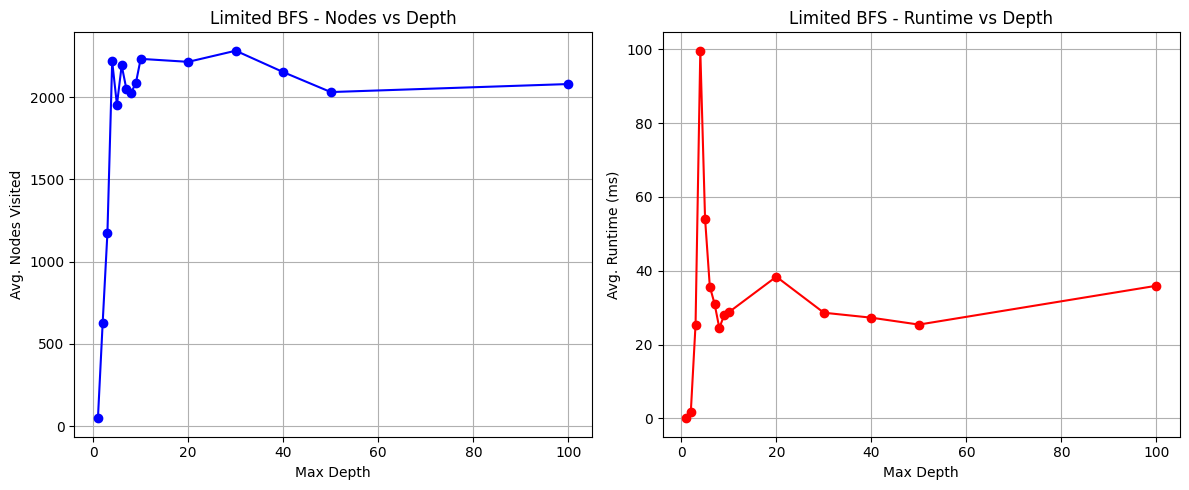

Depth 1: Success Rate = 10.0%
Depth 2: Success Rate = 23.0%
Depth 3: Success Rate = 52.0%
Depth 4: Success Rate = 100.0%
Depth 5: Success Rate = 100.0%
Depth 6: Success Rate = 100.0%
Depth 7: Success Rate = 100.0%
Depth 8: Success Rate = 100.0%
Depth 9: Success Rate = 100.0%
Depth 10: Success Rate = 100.0%
Depth 20: Success Rate = 100.0%
Depth 30: Success Rate = 100.0%
Depth 40: Success Rate = 100.0%
Depth 50: Success Rate = 100.0%
Depth 100: Success Rate = 100.0%


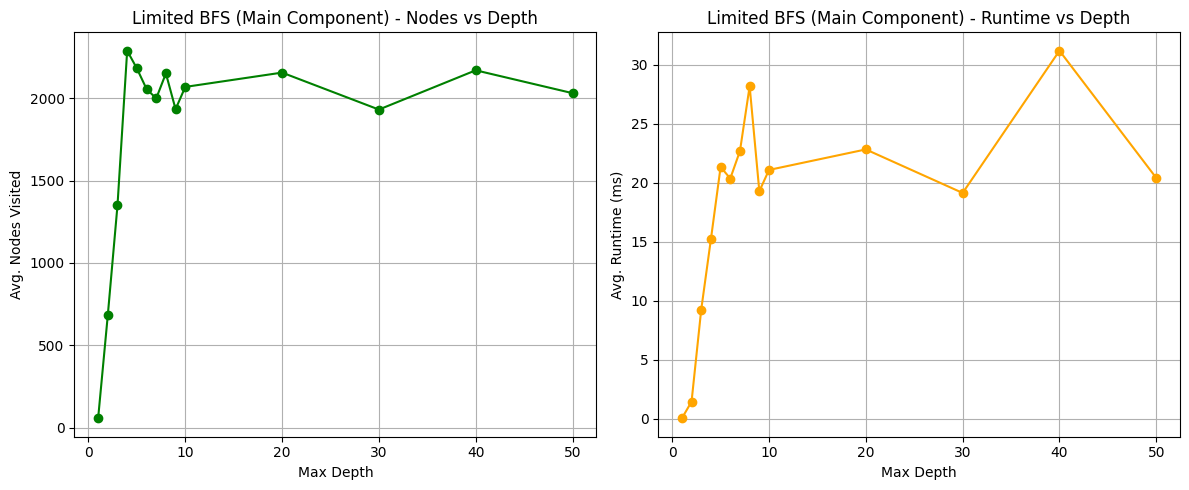

Depth 1: Success Rate = 20.0%
Depth 2: Success Rate = 18.0%
Depth 3: Success Rate = 48.0%
Depth 4: Success Rate = 100.0%
Depth 5: Success Rate = 100.0%
Depth 6: Success Rate = 100.0%
Depth 7: Success Rate = 100.0%
Depth 8: Success Rate = 100.0%
Depth 9: Success Rate = 100.0%
Depth 10: Success Rate = 100.0%
Depth 20: Success Rate = 100.0%
Depth 30: Success Rate = 100.0%
Depth 40: Success Rate = 100.0%
Depth 50: Success Rate = 100.0%


In [7]:
import requests, io, gzip, random, time
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

random.seed(47)
np.random.seed(47)

url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
response = requests.get(url)
response.raise_for_status()
buffer = io.BytesIO(response.content)
with gzip.GzipFile(fileobj=buffer) as gz:
    data_text = gz.read().decode()

edges = [ln.strip() for ln in data_text.splitlines() if ln and not ln.startswith('#')]
graph_stream = io.StringIO("\n".join(edges))
G = nx.read_edgelist(graph_stream, nodetype=int, create_using=nx.Graph())

pagerank_values = nx.pagerank(G, alpha=0.85)
central_node, pr_value = max(pagerank_values.items(), key=lambda x: x[1])
print(f"Top PageRank node: {central_node} (score={pr_value:.5f})")

connected_component = nx.node_connected_component(G, central_node)
print(f"Component size: {len(connected_component)}")

def limited_bfs(graph, start, goal, max_depth):
    q = deque([(start, 0)])
    visited = set()
    while q:
        node, depth = q.popleft()
        if node in visited:
            continue
        visited.add(node)
        if node == goal:
            return True, visited
        if depth < max_depth:
            q.extend((nbr, depth + 1) for nbr in graph.neighbors(node))
    return False, visited

depth_values = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]
trials = 100
avg_nodes, avg_times, success_rates = [], [], []
reachable_nodes = random.sample(list(connected_component), min(500, len(connected_component)))

for depth in depth_values:
    visited_counts, times, success = [], [], 0
    for _ in range(trials):
        start = random.choice(reachable_nodes)
        t0 = time.time()
        found, visited = limited_bfs(G, start, central_node, depth)
        t1 = time.time()
        visited_counts.append(len(visited))
        times.append((t1 - t0) * 1000)
        if found:
            success += 1
    avg_nodes.append(np.mean(visited_counts))
    avg_times.append(np.mean(times))
    success_rates.append(success / trials * 100)

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(depth_values, avg_nodes, marker='o', color='blue')
ax[0].set_xlabel("Max Depth")
ax[0].set_ylabel("Avg. Nodes Visited")
ax[0].set_title("Limited BFS - Nodes vs Depth")
ax[0].grid(True)
ax[1].plot(depth_values, avg_times, marker='o', color='red')
ax[1].set_xlabel("Max Depth")
ax[1].set_ylabel("Avg. Runtime (ms)")
ax[1].set_title("Limited BFS - Runtime vs Depth")
ax[1].grid(True)
plt.tight_layout()
plt.show()

for d, s in zip(depth_values, success_rates):
    print(f"Depth {d}: Success Rate = {s:.1f}%")

largest_component = max(nx.connected_components(G), key=len)
main_graph = G.subgraph(largest_component).copy()
assert central_node in main_graph

depth_values2 = [1,2,3,4,5,6,7,8,9,10,20,30,40,50]
avg_nodes2, avg_times2, success_rates2 = [], [], []
nodes_pool = random.sample(list(main_graph.nodes), min(500, len(main_graph.nodes)))

for depth in depth_values2:
    visited_counts, times, success = [], [], 0
    for _ in range(trials):
        start = random.choice(nodes_pool)
        t0 = time.time()
        found, visited = limited_bfs(main_graph, start, central_node, depth)
        t1 = time.time()
        visited_counts.append(len(visited))
        times.append((t1 - t0) * 1000)
        if found:
            success += 1
    avg_nodes2.append(np.mean(visited_counts))
    avg_times2.append(np.mean(times))
    success_rates2.append(success / trials * 100)

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(depth_values2, avg_nodes2, marker='o', color='green')
ax[0].set_xlabel("Max Depth")
ax[0].set_ylabel("Avg. Nodes Visited")
ax[0].set_title("Limited BFS (Main Component) - Nodes vs Depth")
ax[0].grid(True)
ax[1].plot(depth_values2, avg_times2, marker='o', color='orange')
ax[1].set_xlabel("Max Depth")
ax[1].set_ylabel("Avg. Runtime (ms)")
ax[1].set_title("Limited BFS (Main Component) - Runtime vs Depth")
ax[1].grid(True)
plt.tight_layout()
plt.show()

for d, s in zip(depth_values2, success_rates2):
    print(f"Depth {d}: Success Rate = {s:.1f}%")


به نظر می‌رسد حتی در گراف‌های بدون جهت هم این رفتار دیده می‌شود، چون می‌توان از بیشتر نقاط شبکه در حدود ده گام به گره هدف رسید.

شبکه‌های اجتماعی مانند فیس‌بوک معمولاً ویژگی «دنیای کوچک» دارند. یعنی بیشتر گره‌ها با تعداد کمی مرحله به هم متصل می‌شوند. این ساختار باعث می‌شود مسیرها کوتاه باشند و ارتباط‌ها در کل شبکه به‌هم‌پیوسته و متراکم به نظر برسند.

وجود گره‌های مهم یا گره‌های مرکزی (که مقدار PageRank بالایی دارند) نقش زیادی در این پدیده دارد. این گره‌ها مانند پل عمل می‌کنند و باعث می‌شوند جستجو به عمق زیادی نیاز نداشته باشد.

الگوریتم جستجوی محدود، مانند BFS محدود، در چنین شبکه‌هایی عملکرد بسیار خوبی دارد. در ابتدا با افزایش عمق، زمان اجرا به‌سرعت زیاد می‌شود، اما خیلی زود به حالت پایدار می‌رسد چون بخش بزرگی از شبکه در همان مراحل اولیه پوشش داده می‌شود.

در نتیجه، پیچیدگی جستجو به‌طور مستقیم با ساختار شبکه ارتباط دارد. وقتی شبکه دارای مسیرهای کوتاه و گره‌های مرکزی زیاد باشد، الگوریتم‌های جستجوی محلی می‌توانند هدف را در زمان کوتاه و با کارایی بالا پیدا کنند، حتی اگر شبکه بسیار بزرگ باشد.

در مقابل، در شبکه‌هایی که ارتباط ضعیف یا پراکنده دارند، جستجوی محدود ممکن است به نتیجه نرسد یا نیاز به عمق زیادی برای موفقیت داشته باشد. اما در شبکه‌هایی با ویژگی دنیای کوچک و گره‌های پرقدرت، همین الگوریتم ساده می‌تواند هدف را به‌راحتی پیدا کند.
